In [15]:
from ipywidgets import interact 
from fastai.basics import *

In [16]:
plt.rc('figure', dpi=90)
def plot_function(f,title=None,min=-2.1,max=2.1,color='r',ylim=None):
  x = torch.linspace(min,max, 100)[1:,None]
  if ylim:plt.ylim(ylim)
  plt.plot(x,f(x),color)
  if title is not None: plt.title(title)

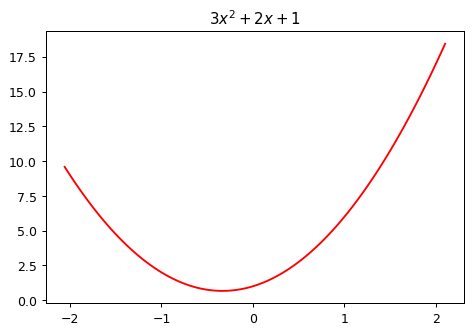

In [17]:
def f(x): return 3*x**2 + 2*x + 1
plot_function(f, '$3x^2 + 2x + 1$' )  

In [18]:
def quad(a,b,c,x): return a*x**2 + b*x + c  
def mk_quad(a,b,c): return partial(quad,a,b,c)

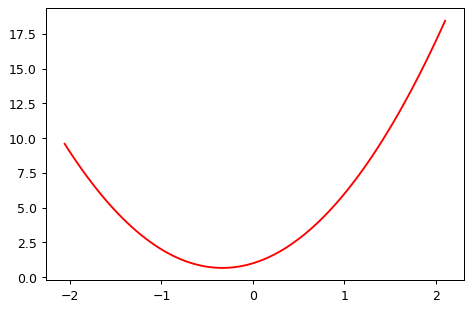

In [19]:
f2 = mk_quad(3,2,1)
plot_function(f2)

In [56]:
# lets add a random noise to our funcition 
def noise(x,scale): return np.random.normal(scale=scale, size=x.shape)
def add_noise(x,mult,add): return x*(1 + noise(x,mult)) + noise(x,add)

In [57]:
np.random.seed(42)

x=torch.linspace(-2,2,steps=20)[:,None]
y = add_noise(f(x),0.15,1.5)

In [58]:
hola = torch.linspace(3,10,steps=5)
hola.size()

torch.Size([5])

In [59]:
#en python cuando se quiere hacer slicing a un array es de la siguiente forma:
# Array[x:] : extrae todos los elementos del array despues de la posicion x (incliuda)
# Array[:x] : extrae todos los elementos del array antes de la posicion x (incluida)

hola[:,None].size()

torch.Size([5, 1])

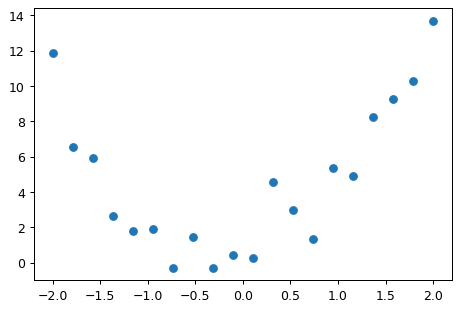

In [60]:
plt.scatter(x,y)

In [61]:
@interact(a=1.1,b=1.1,c=1.1)
def plot_quad(a,b,c):
  plt.scatter(x,y)
  plot_function(mk_quad(a,b,c), ylim=(-3,13))

interactive(children=(FloatSlider(value=1.1, description='a', max=3.3000000000000003, min=-1.1), FloatSlider(v…

In [62]:
def mae(preds, acts) : return (torch.abs(preds-acts)).mean() 

In [65]:
@interact(a=1.1,b=1.1,c=1.1)
def plot_quad(a,b,c):
  f = mk_quad(a,b,c)
  plt.scatter(x,y)
  loss = mae(f(x),y)
  plot_function(f, ylim=(-3,13), title=f"MAE: {loss:.2f}"
  )

interactive(children=(FloatSlider(value=1.1, description='a', max=3.3000000000000003, min=-1.1), FloatSlider(v…

## stochastic gradient descent

In [66]:
def quad_mae(params):
  f = mk_quad(*params)
  return mae(f(x),y)

In [68]:
quad_mae([1.1,1.1,1.1])

tensor(2.4219, dtype=torch.float64)

In [69]:
abc = torch.tensor([1.1,1.1,1.1])

In [71]:
abc.requires_grad_() #we tell pytorch that we want to calculate the gradient for this parameters

tensor([1.1000, 1.1000, 1.1000], requires_grad=True)

In [72]:
loss = quad_mae(abc)
loss

tensor(2.4219, dtype=torch.float64, grad_fn=<MeanBackward0>)

In [73]:
loss.backward()

In [75]:
abc.grad

tensor([-1.3529, -0.0316, -0.5000])

In [76]:
with torch.no_grad():
  abc -= abc.grad*0.01
  loss = quad_mae(abc)

print(f"{loss:.2f}")

2.40


In [84]:
for i in range(10):
  loss = quad_mae(abc)
  loss.backward()
  with torch.no_grad(): abc -= abc.grad*0.01
  print(f'step: {i}; loss={loss:.2f}')

step: 0; loss=2.45
step: 1; loss=2.06
step: 2; loss=1.77
step: 3; loss=1.60
step: 4; loss=1.66
step: 5; loss=1.76
step: 6; loss=1.96
step: 7; loss=2.20
step: 8; loss=2.44
step: 9; loss=2.69
